In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks in TotalCharges with 0 ,as it should be 0 when the tenure is 0

In [4]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")

In [7]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df['customerID'].duplicated().sum()

0

#converting 0 and 1 values in SeniorCitizen to "yes" and "no" value

In [11]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
        

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


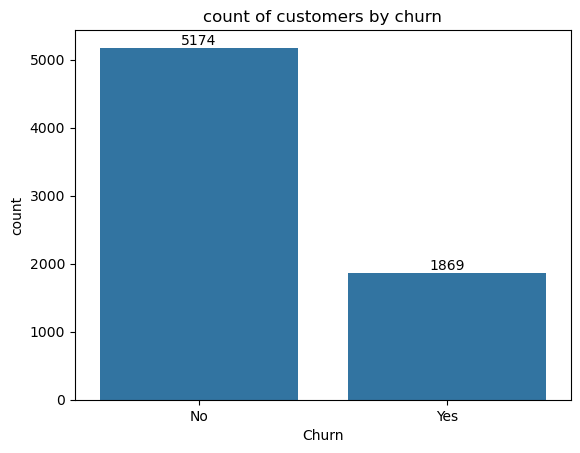

In [23]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by churn")
plt.show()

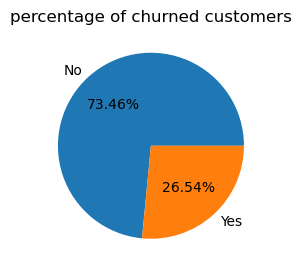

In [24]:
plt.figure(figsize=(3,4))
gb=df.groupby('Churn').agg({"Churn":"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct="%0.2f%%")
plt.title("percentage of churned customers")
plt.show()


#from the given pie chart we can conclude that 26.74% customers have churned out.Now let's explore the reasons behind it

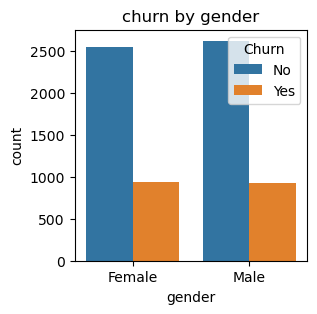

In [9]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("churn by gender")
plt.show()

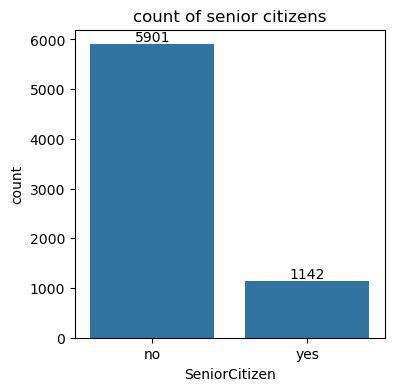

In [21]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("count of senior citizens")
plt.show()

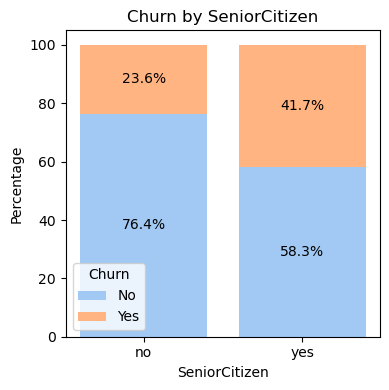

In [17]:
# Calculate counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))

bottom = [0] * len(counts)
colors = sns.color_palette('pastel')

for idx, column in enumerate(percentages.columns):
    ax.bar(counts.index, percentages[column], bottom=bottom, label=column, color=colors[idx])
    bottom = [i + j for i, j in zip(bottom, percentages[column])]

# Add percentage labels
bottom = [0] * len(counts)
for idx, column in enumerate(percentages.columns):
    for i, (value, total) in enumerate(zip(percentages[column], counts.sum(axis=1))):
        ax.text(i, bottom[i] + value / 2, f'{value:.1f}%', ha='center', va='center', color='black', fontsize=10)
        bottom[i] += value

# Customize plot
ax.set_title('Churn by SeniorCitizen')
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('Percentage')
ax.legend(title='Churn')
plt.tight_layout()
plt.show()

#comparatively a  greater% of senior citizens have churned


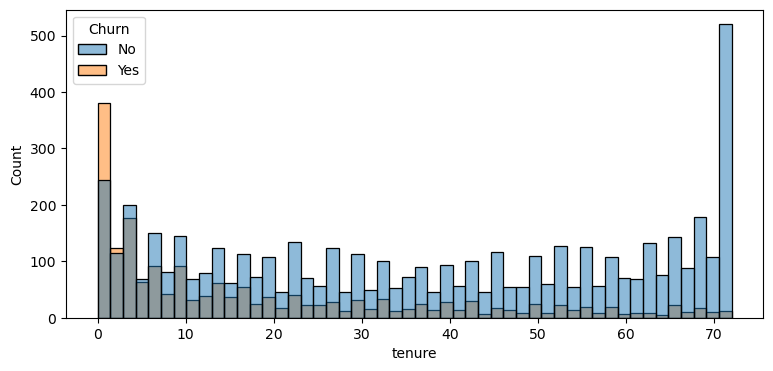

In [29]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure" ,data=df, bins=50,hue="Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used for first few months have churned

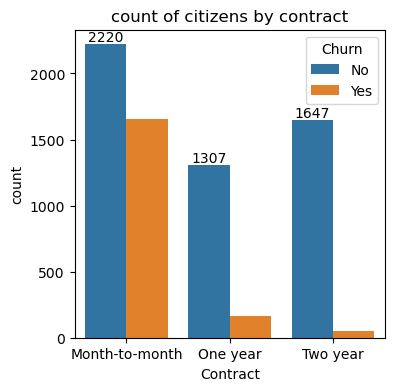

In [31]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("count of citizens by contract")
plt.show()

#people who have month to month contract are likely to churn than those who have 1 or 2 years of contract

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

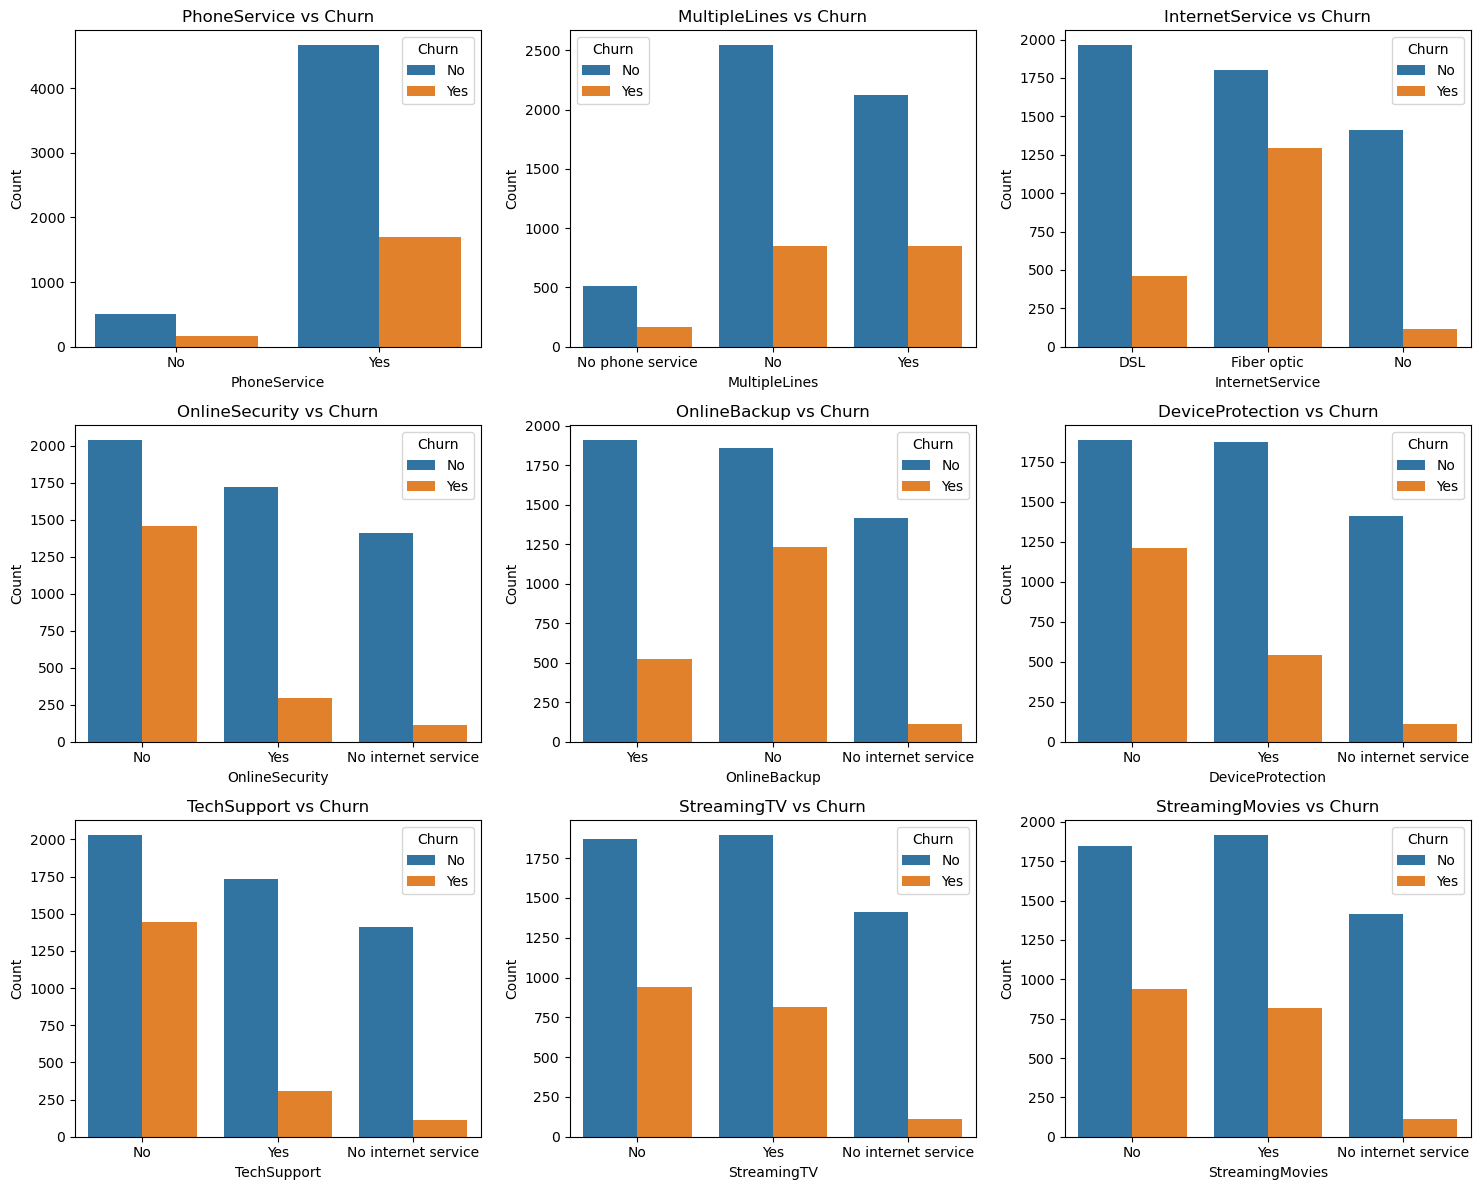

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Ceiling division to get the number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Plot each countplot
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
#Customer Demographics: Approximately 26% of customers have churned. Senior citizens and those without partners or dependents exhibit higher churn rates. 
GitHub

Service Usage: Customers without online security, tech support, or device protection are more prone to churn. Notably, those using fiber optic internet services show a higher churn rate compared to DSL or no internet service. 
GitHub

Contract and Billing: Month-to-month contracts and paperless billing are associated with increased churn, whereas longer-term contracts (one or two years) correlate with customer retention. 
GitHub

Payment Methods: Customers paying via electronic checks have a higher likelihood of churning compared to other payment methods

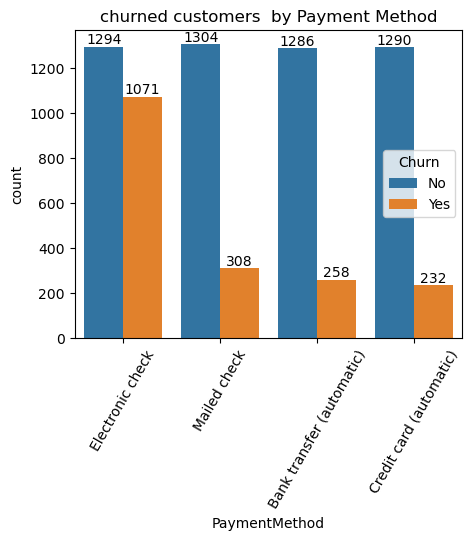

In [41]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churned customers  by Payment Method")
plt.xticks(rotation=60)
plt.show()

#customer is likely to churn when he is using electronic check as the payment method